# Prédiction du succès d’une campagne de Marketing d’une banque

# Analyse macro du jeu de données

In [205]:
# Import des bibliothèques nécessaires

from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Lecture du fichier
df = pd.read_csv('bank.csv', sep = ',')

# Affichage
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [206]:
# Taille du jeu de données et détection des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Corrélation entre variables

In [207]:
# Transformation en numérique

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2=df.copy()

for col in df2.columns:
    df2[col]= le.fit_transform(df2[col])
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


<AxesSubplot:>

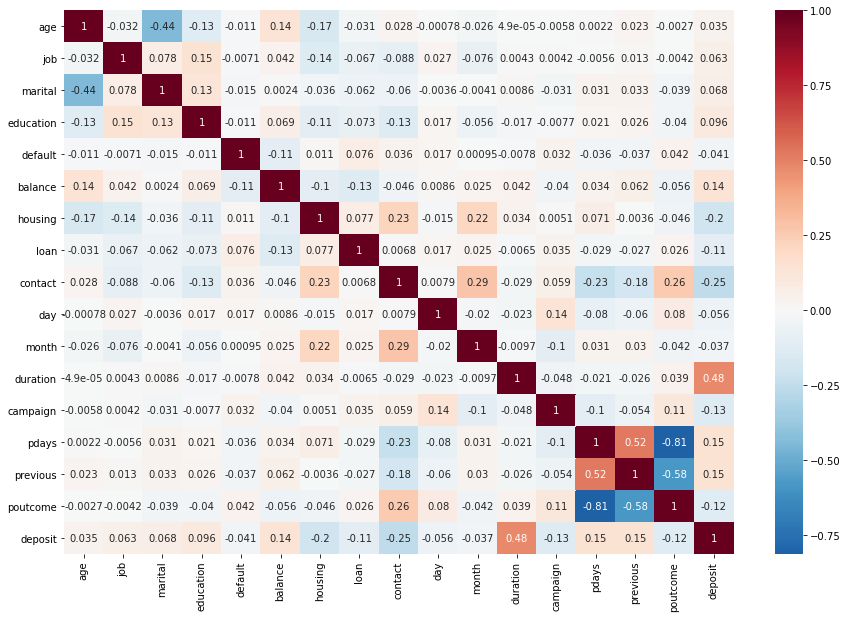

In [208]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, cmap='RdBu_r', center=0)

# OBSERVATIONS :

On remarque une forte corrélation entre previous et poutcome.
Cela veut dire que le nombre de contacts a un fort impact sur la concrétisation d'une campagne.

On voit que duration est la feature la plus corrélée avec la target.

In [209]:
df2.corr()["deposit"]

age          0.034860
job          0.063395
marital      0.067610
education    0.095948
default     -0.040680
balance      0.142630
housing     -0.203888
loan        -0.110580
contact     -0.249847
day         -0.056326
month       -0.037121
duration     0.478913
campaign    -0.129856
pdays        0.146809
previous     0.147624
poutcome    -0.122369
deposit      1.000000
Name: deposit, dtype: float64

<AxesSubplot:title={'center':'Correlation des features avec la variable cible deposit'}>

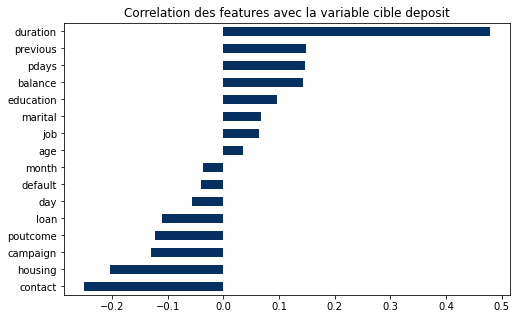

In [210]:
# Corrélation des features avec la target

plt.figure(figsize=(8,5))
plt.title(label="Correlation des features avec la variable cible deposit")
df2.corr()['deposit'].sort_values().drop('deposit').plot(kind='barh', cmap='RdBu_r')


# OBSERVATIONS :

La feature avec la plus forte corrélation avec notre target est la durée de contact.
Malheureusement il s'agit d'une variable non connue à priori qui ne peut pas être utilisée dans un modèle.

# Jeu de données de départ

In [211]:
# Réimport du fichier
df2 = df.copy()

# Affichage
df2.head()

# Données numériques et catégorielles
numerics = df2.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
categoricals= df2.select_dtypes(include=['object']).columns

# Le traitement des variables numériques

In [212]:
df2[numerics].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


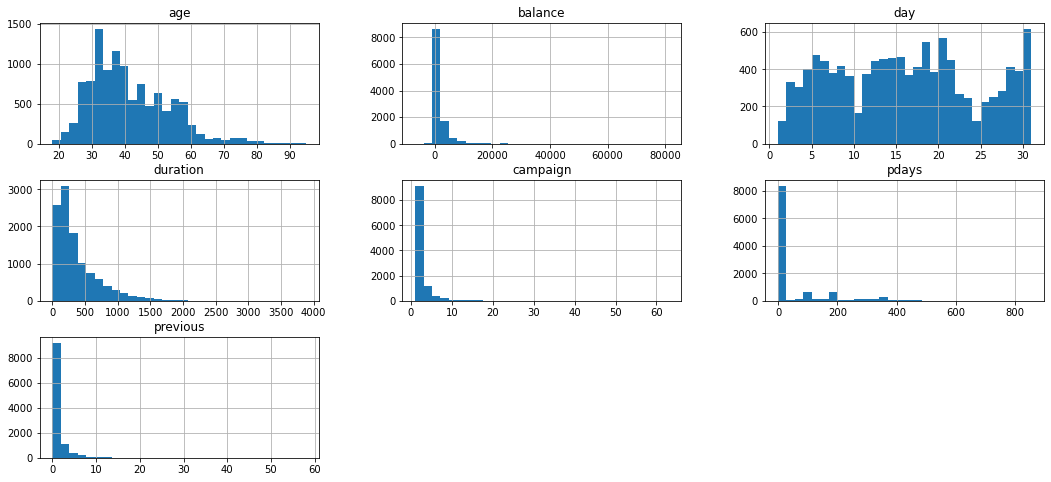

In [213]:
# Analyse des variables numériques
df2[numerics].hist(bins=30, figsize=(18, 8), layout=(3, 3));

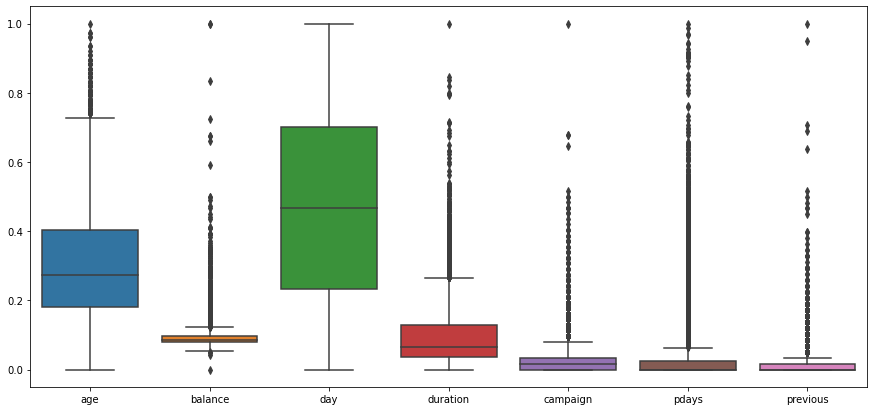

In [214]:
# Analyse des variables numériques

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

plt.figure(figsize=(15,7))
df_scaler =df2[numerics]
z = scaler.fit_transform(df_scaler)
z = pd.DataFrame(z, columns=df_scaler.columns)
sns.boxplot(data=z);

# REMARQUES
# Bcp de valeurs abbérantes pour balance, duration, campaign pdays et previous

In [215]:
print("_________________________________________")
print("Nombre d'observations avec valeurs à ZERO")
print("_________________________________________")

for i in numerics:
    print(f"{i}: ", df2[df2[i]==0][i].count())

print("_________________________________________")
print("Nombre d'observations avec valeurs à -1")
print("_________________________________________")

for i in numerics:
    print(f"{i}: ", df2[df2[i]==-1][i].count())

_________________________________________
Nombre d'observations avec valeurs à ZERO
_________________________________________
age:  0
balance:  774
day:  0
duration:  0
campaign:  0
pdays:  0
previous:  8324
_________________________________________
Nombre d'observations avec valeurs à -1
_________________________________________
age:  0
balance:  9
day:  0
duration:  0
campaign:  0
pdays:  8324
previous:  0


# OBSERVATIONS :

On remarque que 8324 clients n'ont pas été contactés lors de la campagne précédente.
PREVIOUS = 0
PDAYS = -1

In [216]:
# Creation de tranches d'âges
df2['t_age'] = pd.cut(x = df2['age'],
                      bins = [17, 30, 40, 50, 65, 96],
                      labels = ['18-30', '30-40','40-50', '50-65','65-95'])

# Creation de tranches de solde compte bancaire = balance
df2['t_balance'] = pd.qcut(x=df2["balance"], q=4, labels=[1,2,3,4])

# Creation de tranches de durée de contact = duration
df2['t_duration'] = pd.qcut(df2["duration"], q=4, labels=[1,2,3,4])

# Creation de tranches de nombre de contact = campaign > Corrige le problème de valeurs abbérantes et limite à 4 contacts
df2['t_campaign'] = pd.cut(x = df2['campaign'], bins = [0, 1, 2, 3, 99], labels = [1, 2, 3, 4])

# Création d'une catégorie pour contact campagne précédente oui/non
df2['contact_last_campaign'] = np.where(df2['pdays']>=0, 'yes', 'no')

# et créé des tranches en fonction du délai écoulé
df2['t_pdays'] = pd.cut(x = df2['pdays'],
                        bins = [-2, 0, 200, 999],
                        labels = ['NON CONTACTE', 'MOINS DE 200J', 'PLUS DE 200J'])

# Creation de tranches de nombre de contact avant la campagne
df2['previous'] = pd.cut(x = df2['previous'], bins = [0, 1, 2, 3, 99], labels = [1, 2, 3, 4])

In [217]:
drop_cols=['age','balance','duration','campaign','pdays','previous']
df2 = df2.drop(drop_cols, axis=1)

# Ou sont les cibles ?

no     0.52616
yes    0.47384
Name: deposit, dtype: float64
no     5873
yes    5289
Name: deposit, dtype: int64


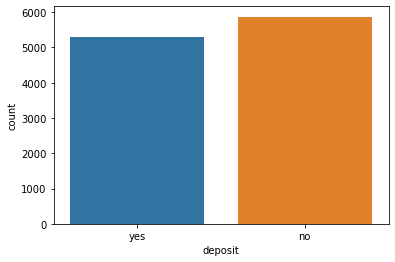

In [218]:
sns.countplot(data=df2, x='deposit')
print(df2["deposit"].value_counts(normalize=True))
print(df2["deposit"].value_counts())

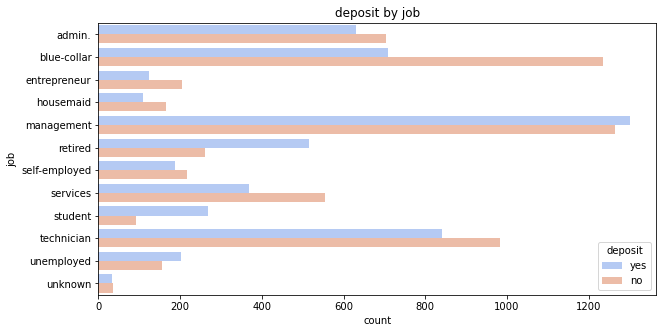

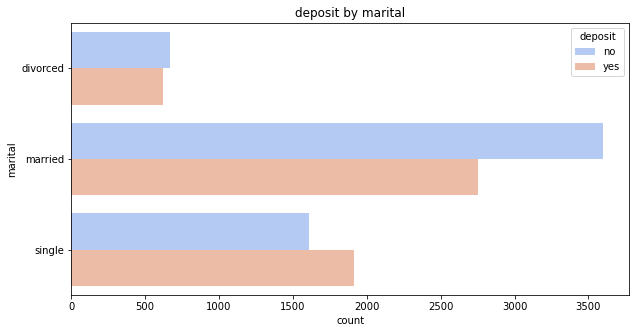

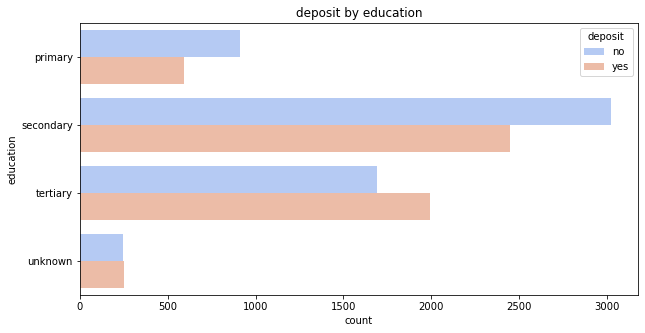

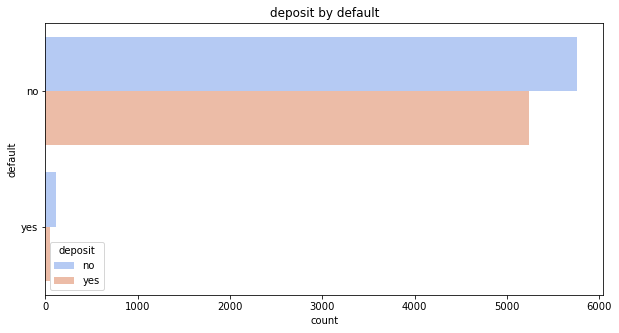

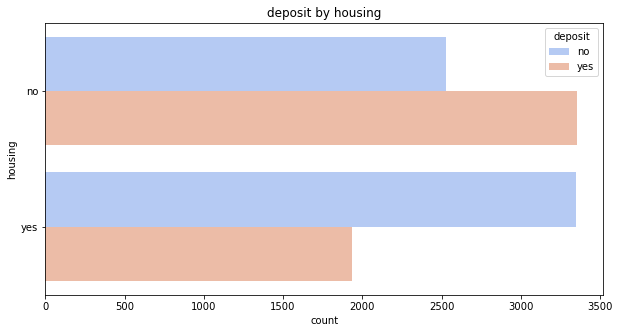

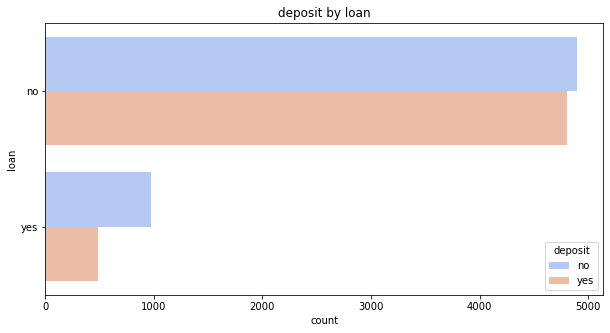

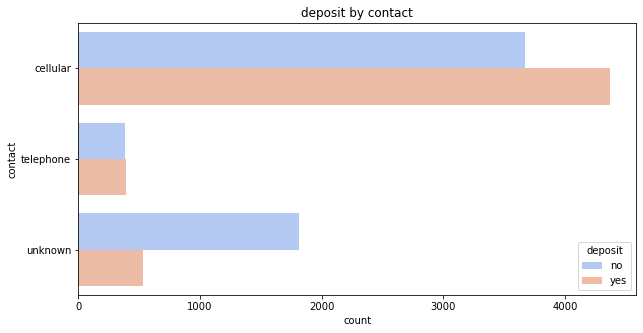

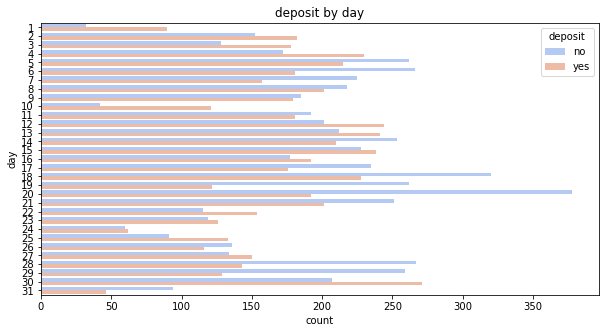

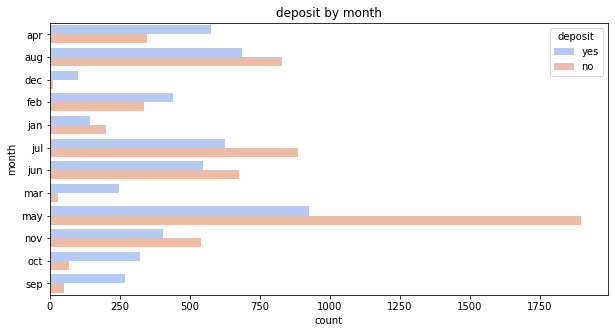

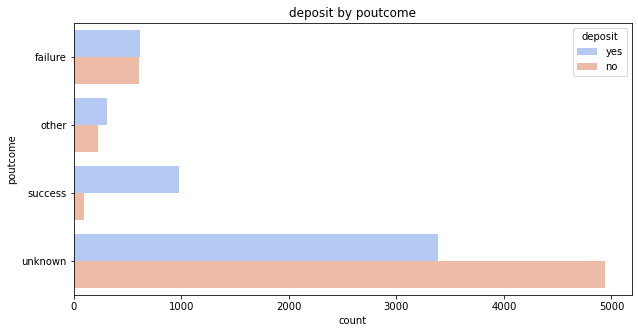

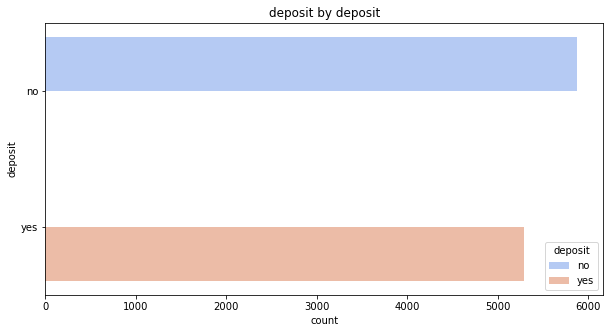

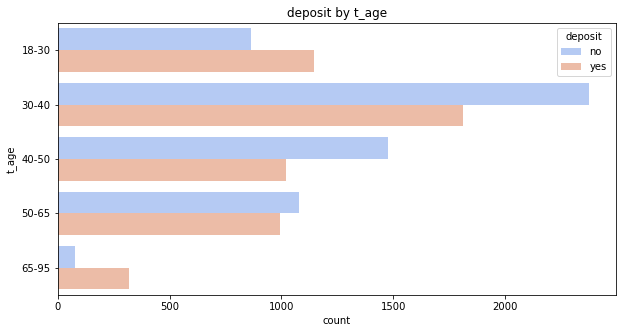

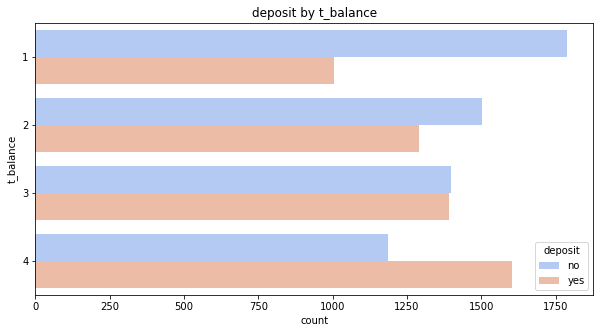

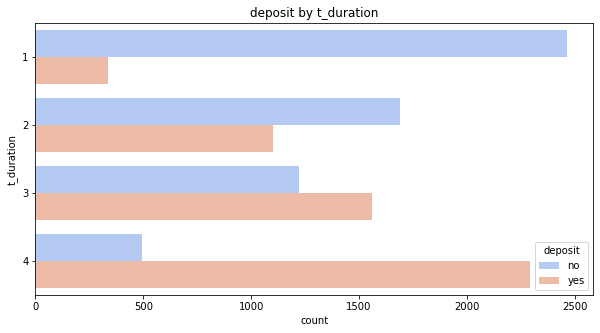

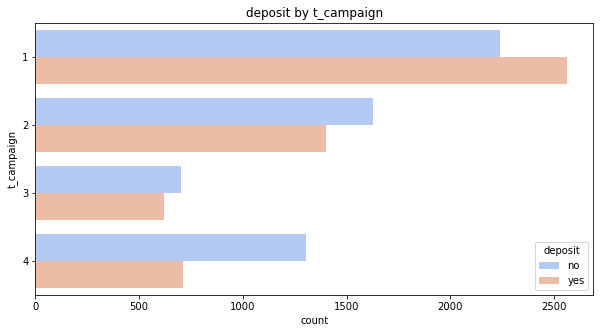

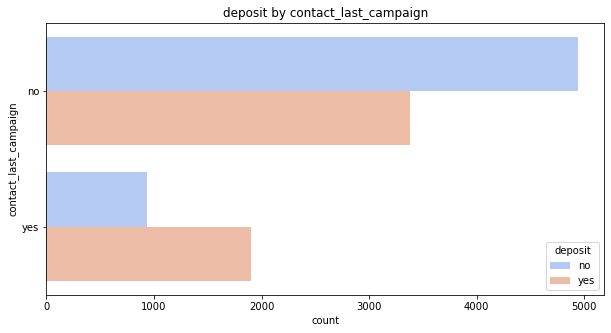

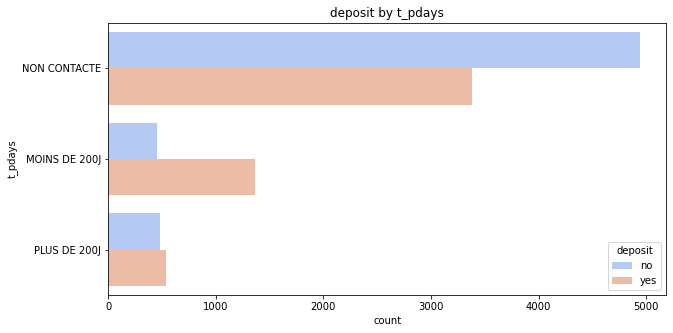

In [219]:
for col in df2.columns:   
    
    df2.sort_values(by=[col], inplace=True)
    plt.figure(figsize=(10,5))
    
    plt.title(label=f"deposit by {col}")
    sns.countplot(data=df2, y=f"{col}", hue='deposit', palette='coolwarm')

# OBSERVATIONS :






# Le traitement des variables catégorielles

In [220]:
# Description des variables catégorielles
df2.describe(include= ["object","category"]).transpose()

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\li

________________________________________________________________________________
Describe : {'job'} ----------------------------
count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object
Percent : {'job'} --------------------------
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: job, dtype: float64
________________________________________________________________________________
Describe : {'marital'} ----------------------------
count       11162
unique          3
top       married
freq         6351
Name: marital, dtype: object
Percent : {'marital'} --------------------------
married     0.568984
single      0.315176
divorced    0.115839
Name: marital, dtype: float64
___

C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\li

________________________________________________________________________________
Describe : {'loan'} ----------------------------
count     11162
unique        2
top          no
freq       9702
Name: loan, dtype: object
Percent : {'loan'} --------------------------
no     0.869199
yes    0.130801
Name: loan, dtype: float64
________________________________________________________________________________
Describe : {'contact'} ----------------------------
count        11162
unique           3
top       cellular
freq          8042
Name: contact, dtype: object
Percent : {'contact'} --------------------------
cellular     0.720480
unknown      0.210177
telephone    0.069342
Name: contact, dtype: float64
________________________________________________________________________________
Describe : {'month'} ----------------------------
count     11162
unique       12
top         may
freq       2824
Name: month, dtype: object
Percent : {'month'} --------------------------
may    0.253001
aug    

C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GY0234\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


________________________________________________________________________________
Describe : {'deposit'} ----------------------------
count     11162
unique        2
top          no
freq       5873
Name: deposit, dtype: object
Percent : {'deposit'} --------------------------
no     0.52616
yes    0.47384
Name: deposit, dtype: float64


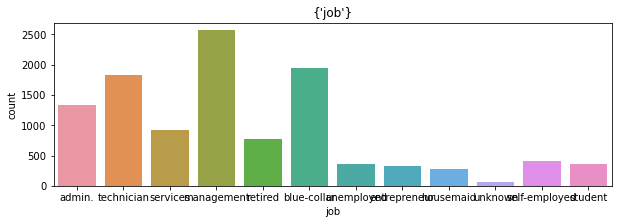

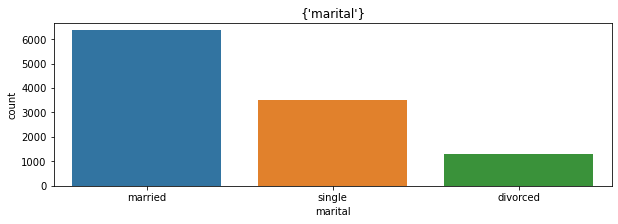

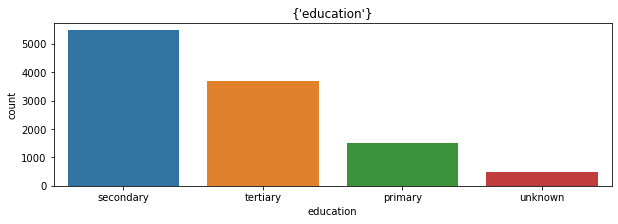

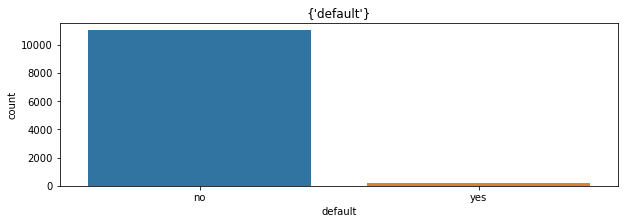

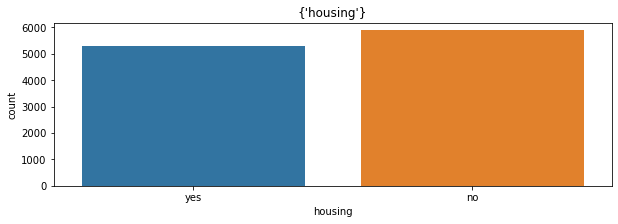

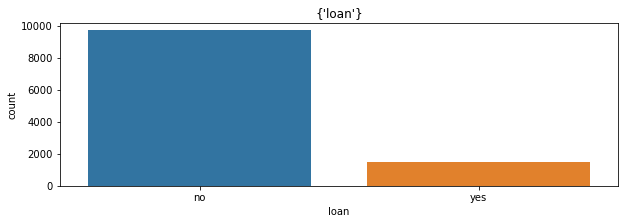

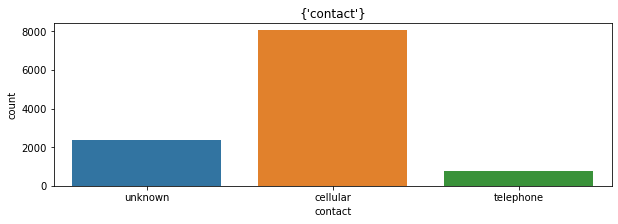

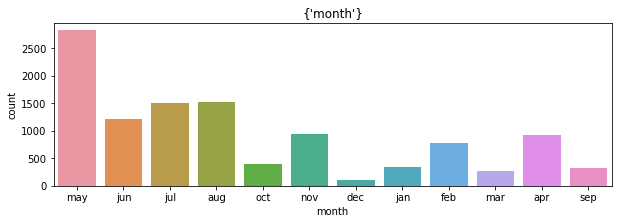

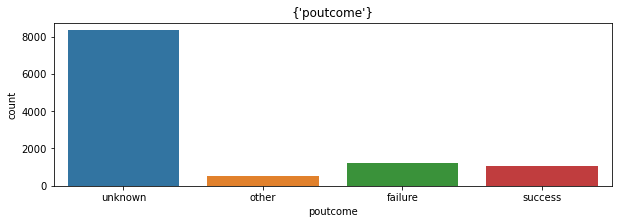

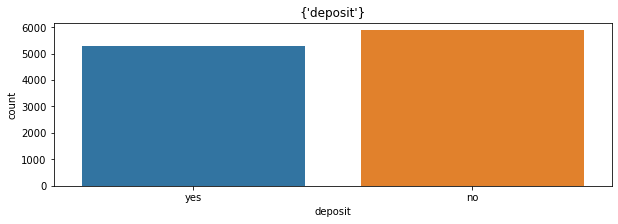

In [221]:
for var in categoricals:
    
    plt.figure(figsize=(10,3))
    plt.title(label={var})
    sns.countplot(df[var]);
    
    print('________________________________________________________________________________')
    print('Describe :',{var},'----------------------------')
    print(df2[var].describe())
    print('Percent :',{var}, '--------------------------')
    print(df2[var].value_counts(normalize=True))

In [222]:
# Création de dummies
var=['marital','education','poutcome','contact','t_age','t_balance','t_duration','t_campaign','t_pdays']
df2= df2.join(pd.get_dummies(df2[var], prefix=var))
df2 = df2.drop(df2[var], axis=1)

# Transformation en numérique
var=['job']
df2[var]= le.fit_transform(df2[var])

# Remplacement de valeurs
var = ["month"]
df2[var] = df2[var].replace(('jan', 'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                            (1,2,3,4,5,6,7,8,9,10,11,12))

# Remplace yes/no par 1/0
var = ["default", "housing","loan","deposit","contact_last_campaign"]
df2[var] = df2[var].replace(('yes', 'no'), (1, 0))

C:\Users\GY0234\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [223]:
df2.head()

,job,default,housing,loan,day,month,deposit,contact_last_campaign,marital_divorced,marital_married,...,t_duration_2,t_duration_3,t_duration_4,t_campaign_1,t_campaign_2,t_campaign_3,t_campaign_4,t_pdays_NON CONTACTE,t_pdays_MOINS DE 200J,t_pdays_PLUS DE 200J
10447,9,0,1,0,28,5,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
6158,4,0,0,0,5,2,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
55,0,0,1,0,14,5,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1127,4,0,1,0,2,2,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4140,0,0,1,0,19,6,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [224]:
df2.columns

Index(['job', 'default', 'housing', 'loan', 'day', 'month', 'deposit',
       'contact_last_campaign', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       't_age_18-30', 't_age_30-40', 't_age_40-50', 't_age_50-65',
       't_age_65-95', 't_balance_1', 't_balance_2', 't_balance_3',
       't_balance_4', 't_duration_1', 't_duration_2', 't_duration_3',
       't_duration_4', 't_campaign_1', 't_campaign_2', 't_campaign_3',
       't_campaign_4', 't_pdays_NON CONTACTE', 't_pdays_MOINS DE 200J',
       't_pdays_PLUS DE 200J'],
      dtype='object')

<AxesSubplot:>

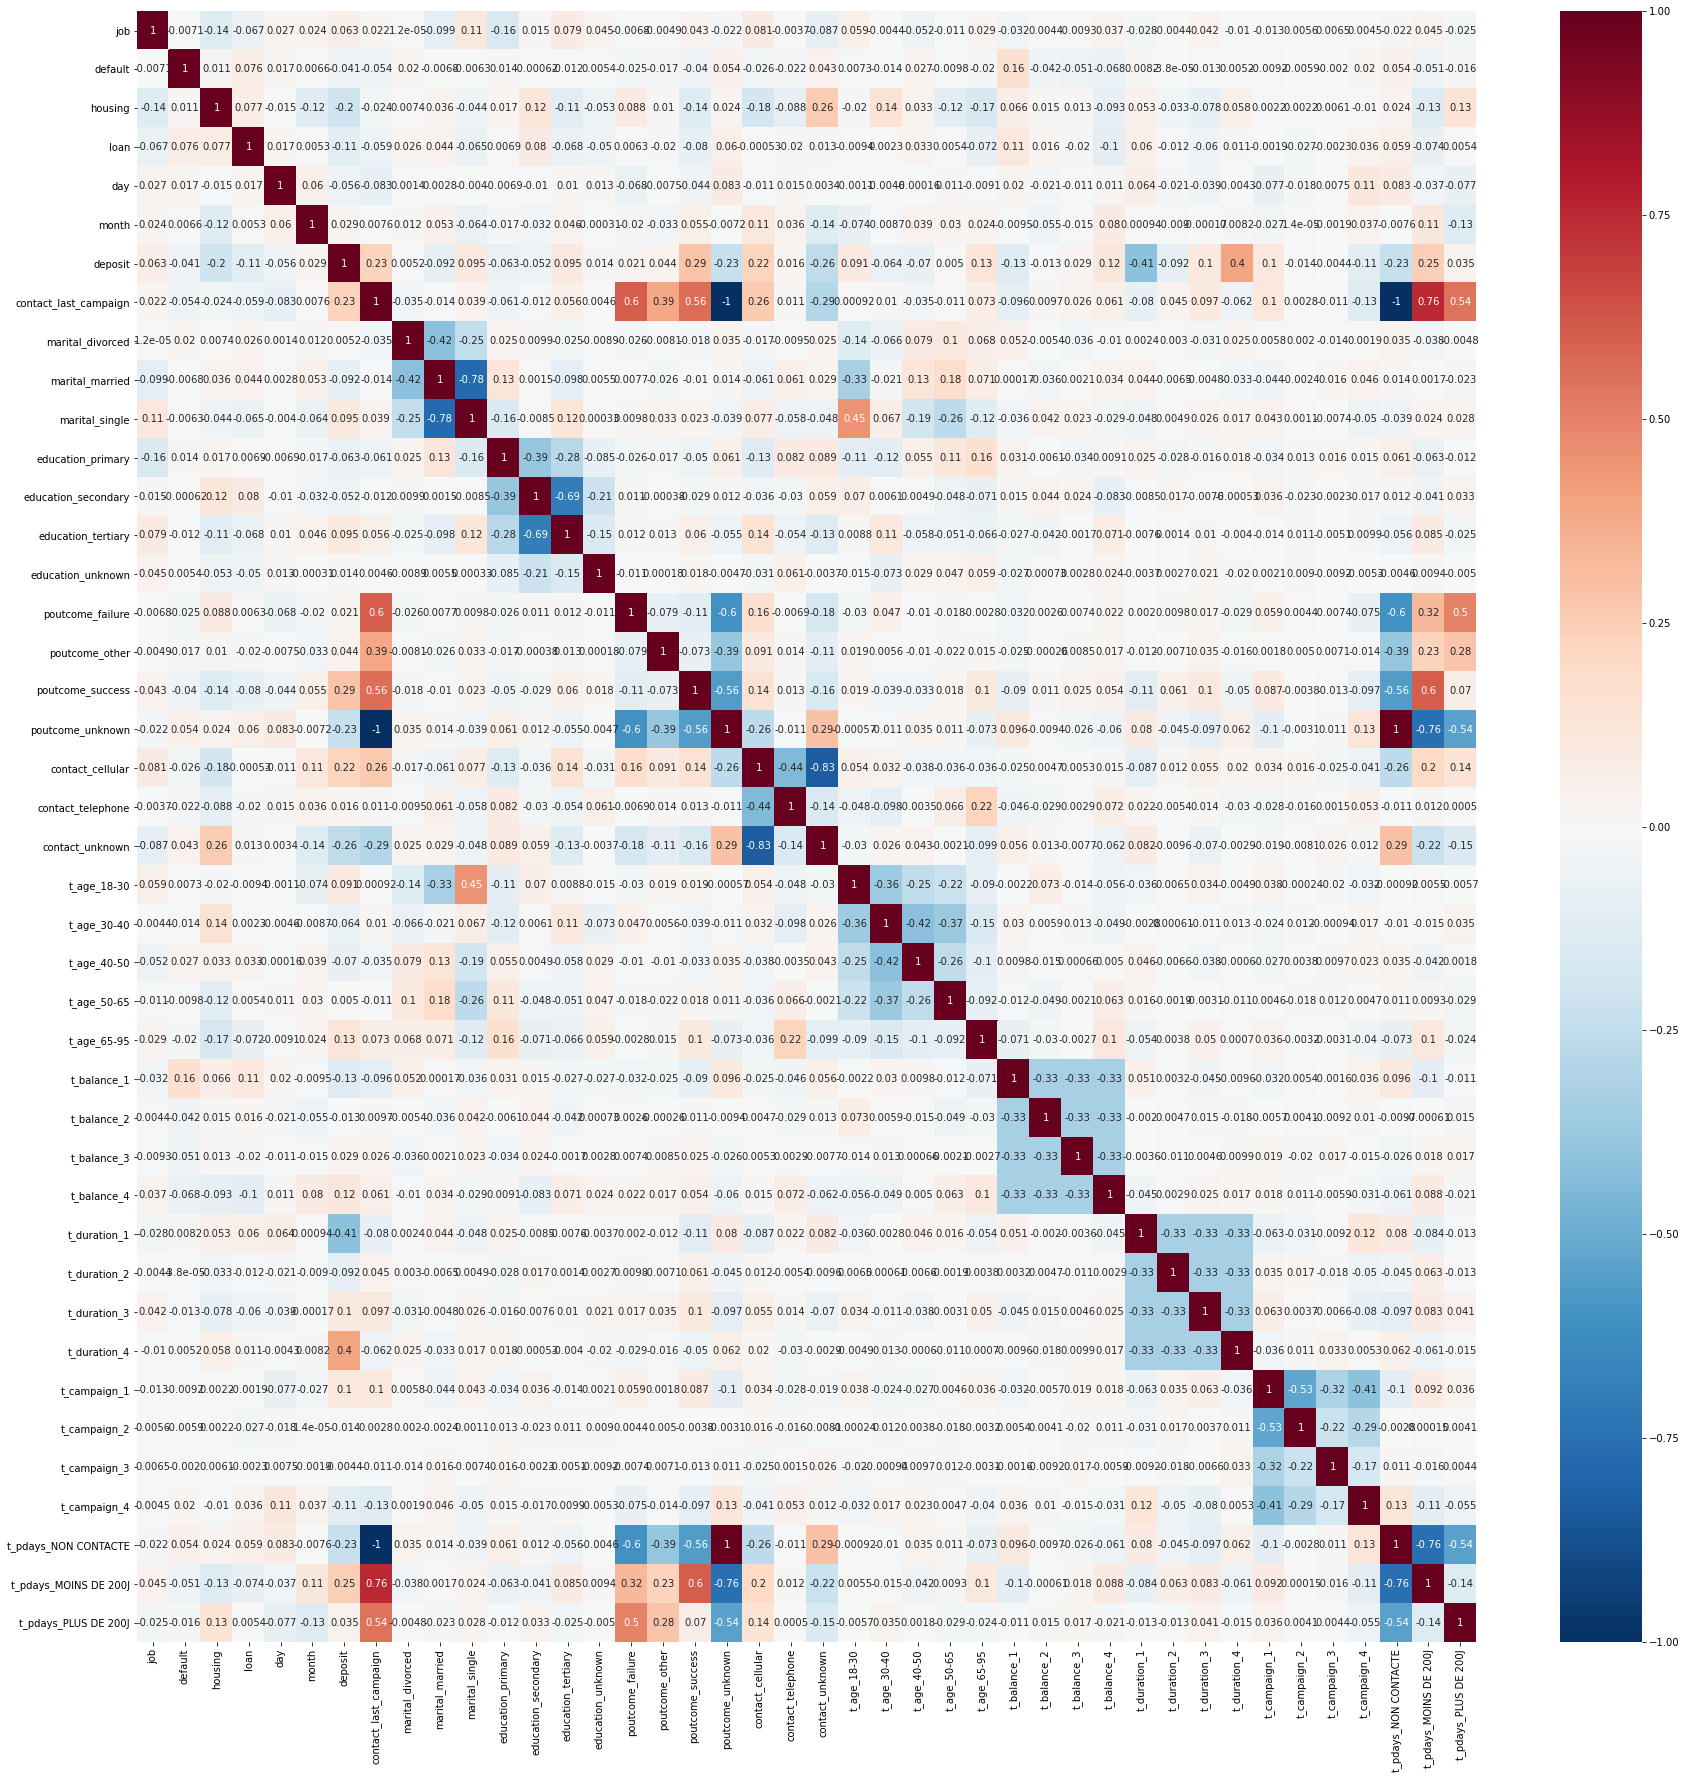

In [225]:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(),annot=True, cmap='RdBu_r', center=0)

In [226]:
df2.corr()["deposit"]

job                      0.063395
default                 -0.040680
housing                 -0.203888
loan                    -0.110580
day                     -0.056326
month                    0.028645
deposit                  1.000000
contact_last_campaign    0.230850
marital_divorced         0.005228
marital_married         -0.092157
marital_single           0.094632
education_primary       -0.063002
education_secondary     -0.051952
education_tertiary       0.094598
education_unknown        0.014355
poutcome_failure         0.020714
poutcome_other           0.044059
poutcome_success         0.286642
poutcome_unknown        -0.230470
contact_cellular         0.223252
contact_telephone        0.016420
contact_unknown         -0.256136
t_age_18-30              0.090643
t_age_30-40             -0.063903
t_age_40-50             -0.070494
t_age_50-65              0.004951
t_age_65-95              0.127154
t_balance_1             -0.132142
t_balance_2             -0.013461
t_balance_3   

<AxesSubplot:title={'center':'Correlation des features avec la variable cible deposit'}>

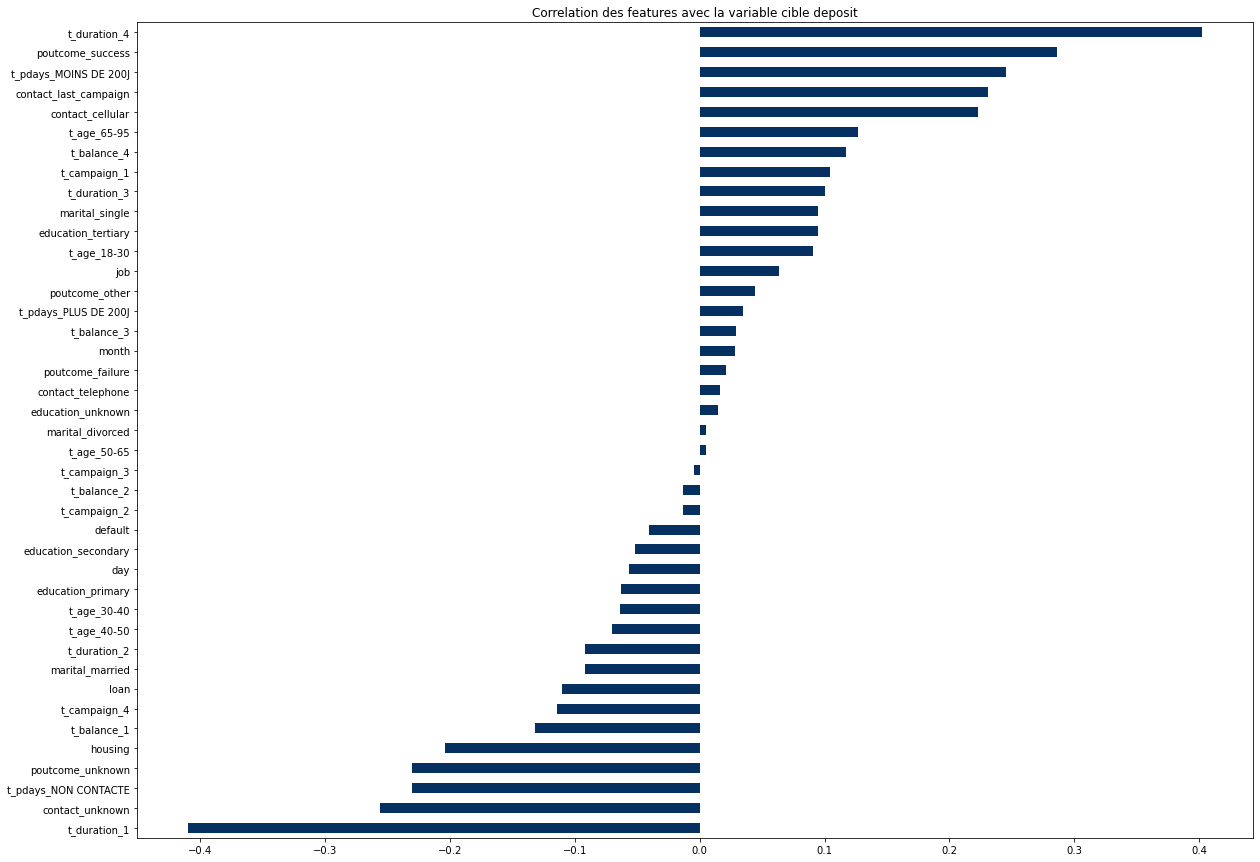

In [227]:
plt.figure(figsize=(20,15))
plt.title(label="Correlation des features avec la variable cible deposit")
df2.corr()['deposit'].sort_values().drop('deposit').plot(kind='barh', cmap='RdBu_r')

# REMARQUE 

Fin de l'étape de préparation de la base de données

# Selection des données

In [228]:
df3=df2.copy()

In [229]:
df3.head()

,job,default,housing,loan,day,month,deposit,contact_last_campaign,marital_divorced,marital_married,...,t_duration_2,t_duration_3,t_duration_4,t_campaign_1,t_campaign_2,t_campaign_3,t_campaign_4,t_pdays_NON CONTACTE,t_pdays_MOINS DE 200J,t_pdays_PLUS DE 200J
10447,9,0,1,0,28,5,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
6158,4,0,0,0,5,2,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
55,0,0,1,0,14,5,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1127,4,0,1,0,2,2,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4140,0,0,1,0,19,6,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


# Test de modèles prédictifs

In [230]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, roc_auc_score, auc, precision_score, recall_score, classification_report
from sklearn import linear_model, neighbors, svm, tree, ensemble
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

In [231]:
# Isoler les features de la target -----------------------------------------------------------------------------
target = df3['deposit']
feats = df3.drop(['deposit'], axis=1)

# Séparation des données en jeu d'entraînement et de test ------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25)

# Normaliser les données - MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Affichage de la distribution de la variable cible -------------------------------------------------------------
target.value_counts(normalize=True)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

In [232]:
# Sauvegarde des résulats de chacun des modèles
models=[]
scores =[]
precision=[]
rappel=[]
roc=[]

# Régression logistique

In [233]:
# Création avec le meilleur paramètre
rlc = linear_model.LogisticRegression(C=10)
rlc.fit(X_train, y_train)

# Calculer le taux de bonnes prédictions du modèle (accuracy)
print('Score train :', rlc.score(X_train, y_train))
print('Score test :', rlc.score(X_test, y_test))

# Precision = Sur 100% des prédits positifs, combien sont réellement Positifs
print('Precision Score: ', precision_score(y_test, rlc.predict(X_test)))

# Rappel = Sur 100% des vrais positifs, combien sont classés Positifs
print('Recall Score: ', recall_score(y_test, rlc.predict(X_test)))

# Indice de ROC = Proportion de vrais positifs en fonction de la proportion de faux positifs
print('Indice de ROC : ', roc_auc_score(y_test, rlc.predict(X_test)))

Score train : 0.8088639350137379
Score test : 0.8126119670369043
Precision Score:  0.8050407709414381
Recall Score:  0.8068350668647846
Indice de ROC :  0.8124140732247798


In [234]:
# Calcul des prédictions sur  données test
y_pred = rlc.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,1182,263
1,260,1086


In [235]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1445
           1       0.81      0.81      0.81      1346

    accuracy                           0.81      2791
   macro avg       0.81      0.81      0.81      2791
weighted avg       0.81      0.81      0.81      2791



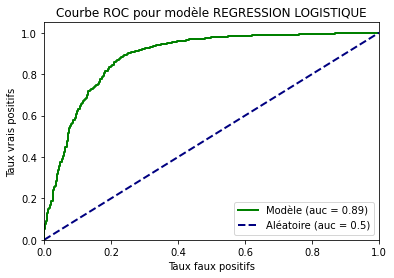

In [236]:
probs_rlc = rlc.predict_proba(X_test)
fpr, tpr, seuils = roc_curve(y_test, probs_rlc[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Modèle (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC pour modèle REGRESSION LOGISTIQUE')
plt.legend(loc="lower right")
plt.show();

In [237]:
# Sauvegarde des résultats
models.append("Regression logistique")
scores.append(rlc.score(X_test, y_test))
precision.append(precision_score(y_test, rlc.predict(X_test)))
rappel.append(recall_score(y_test, rlc.predict(X_test)))
roc.append(roc_auc_score(y_test, rlc.predict(X_test)))

No handles with labels found to put in legend.


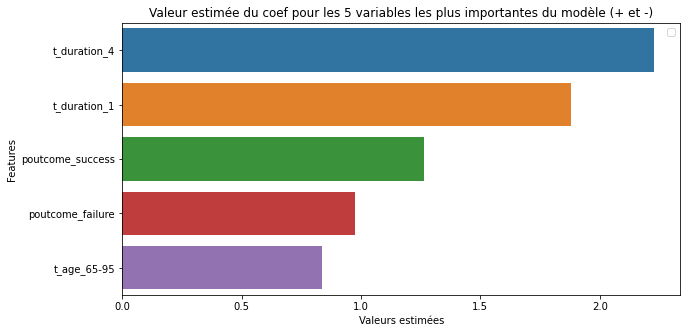

In [238]:
# Interpretabilité du modèle
coeffs_rlc=pd.DataFrame({'feature': feats.columns,'coef_rlc': rlc.coef_[0]})
coeffs_rlc["coef_rlc"]=np.abs(coeffs_rlc["coef_rlc"]) # valeur absolue
coeffs_rlc["rank_rlc"] = coeffs_rlc["coef_rlc"].rank(ascending=0) #ranking

plt.figure(figsize=(10,5))
sns.barplot(data=coeffs_rlc.sort_values("coef_rlc",ascending=False, key=abs).head(5),x="coef_rlc", y="feature")
plt.xlabel('Valeurs estimées')
plt.ylabel('Features')
plt.title('Valeur estimée du coef pour les 5 variables les plus importantes du modèle (+ et -)')
plt.legend();

# KNN

In [239]:
# Création avec le meilleur paramètre
knn = neighbors.KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train, y_train)

# Calculer le taux de bonnes prédictions du modèle (accuracy)
print('Score train :', knn.score(X_train, y_train))
print('Score test :', knn.score(X_test, y_test))

# Precision = Sur 100% des prédits positifs, combien sont réellement Positifs
print('Precision Score: ', precision_score(y_test, knn.predict(X_test)))

# Rappel = Sur 100% des vrais positifs, combien sont classés Positifs
print('Recall Score: ', recall_score(y_test, knn.predict(X_test)))

Score train : 0.806594194242026
Score test : 0.8111787889645289
Precision Score:  0.7849686847599165
Recall Score:  0.8380386329866271


In [240]:
# Calcul des prédictions sur  données test
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,1136,309
1,218,1128


In [241]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1445
           1       0.78      0.84      0.81      1346

    accuracy                           0.81      2791
   macro avg       0.81      0.81      0.81      2791
weighted avg       0.81      0.81      0.81      2791



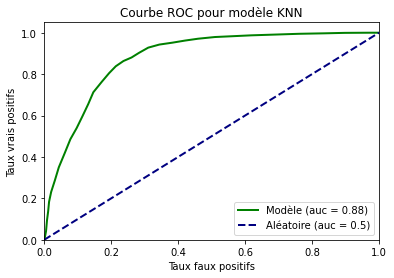

In [242]:
probs_knn = knn.predict_proba(X_test)
fpr, tpr, seuils = roc_curve(y_test, probs_knn[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Modèle (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC pour modèle KNN')
plt.legend(loc="lower right")
plt.show();

In [243]:
# Sauvegarde des résultats
models.append("K plus proches voisins")
scores.append(knn.score(X_test, y_test))
precision.append(precision_score(y_test, knn.predict(X_test)))
rappel.append(recall_score(y_test, knn.predict(X_test)))
roc.append(roc_auc_score(y_test, knn.predict(X_test)))

# Arbres de décisions

In [244]:
# Création avec le meilleur paramètre
dtc = tree.DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train, y_train)

# Calculer le taux de bonnes prédictions du modèle (accuracy)
print('Score train :', dtc.score(X_train, y_train))
print('Score test :', dtc.score(X_test, y_test))

# Precision = Sur 100% des prédits positifs, combien sont réellement Positifs
print('Precision Score: ', precision_score(y_test, dtc.predict(X_test)))

# Rappel = Sur 100% des vrais positifs, combien sont classés Positifs
print('Recall Score: ', recall_score(y_test, dtc.predict(X_test)))

Score train : 0.843507346792498
Score test : 0.8262271587244715
Precision Score:  0.8249056603773585
Recall Score:  0.812035661218425


In [245]:
# Calcul des prédictions sur  données test
y_pred = dtc.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,1213,232
1,253,1093


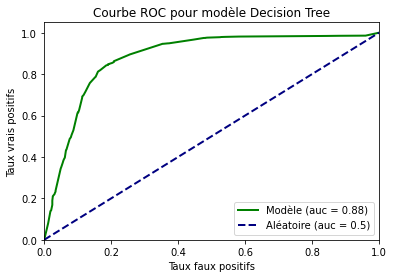

In [246]:
probs_dtc = dtc.predict_proba(X_test)
fpr, tpr, seuils = roc_curve(y_test, probs_dtc[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Modèle (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC pour modèle Decision Tree')
plt.legend(loc="lower right")
plt.show();

In [247]:
# Sauvegarde des résultats
models.append("Decision Tree")
scores.append(dtc.score(X_test, y_test))
precision.append(precision_score(y_test, dtc.predict(X_test)))
rappel.append(recall_score(y_test, dtc.predict(X_test)))
roc.append(roc_auc_score(y_test, dtc.predict(X_test)))

No handles with labels found to put in legend.


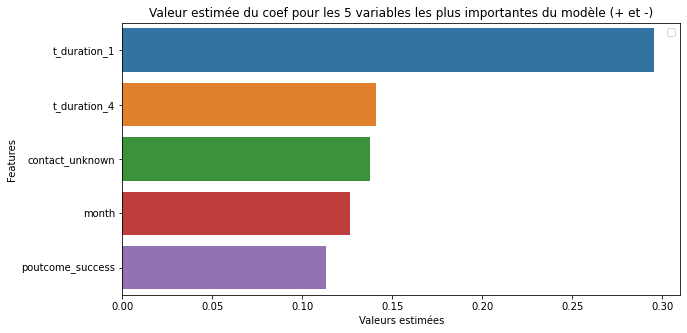

In [248]:
# Interpretabilité du modèle
coeffs_dtc=pd.DataFrame({'feature': feats.columns,'coef_dtc': dtc.feature_importances_})
coeffs_dtc["coef_dtc"]=np.abs(coeffs_dtc["coef_dtc"]) # valeur absolue
coeffs_dtc["rank_dtc"]=coeffs_dtc["coef_dtc"].rank(ascending=0) #ranking

plt.figure(figsize=(10,5))
sns.barplot(data=coeffs_dtc.sort_values("coef_dtc",ascending=False, key=abs).head(5),x="coef_dtc", y="feature")
plt.xlabel('Valeurs estimées')
plt.ylabel('Features')
plt.title('Valeur estimée du coef pour les 5 variables les plus importantes du modèle (+ et -)')
plt.legend();

#feat_importances = pd.Series(clf.feature_importances_, index=feats.columns)
#feat_importances.nlargest(5).plot(kind='barh')

# Random Forest

In [249]:
# Création avec le meilleur paramètre
rfc = ensemble.RandomForestClassifier(n_jobs=1) 
rfc.fit(X_train, y_train)

# Calculer le taux de bonnes prédictions du modèle (accuracy)
print('Score train :', rfc.score(X_train, y_train))
print('Score test :', rfc.score(X_test, y_test))

# Precision = Sur 100% des prédits positifs, combien sont réellement Positifs
print('Precision Score: ', precision_score(y_test, rfc.predict(X_test)))

# Rappel = Sur 100% des vrais positifs, combien sont classés Positifs
print('Recall Score: ', recall_score(y_test, rfc.predict(X_test)))

Score train : 0.9992832397563015
Score test : 0.8394840558939448
Precision Score:  0.8225574712643678
Recall Score:  0.850668647845468


In [250]:
# Calcul des prédictions sur  données test
y_pred = rfc.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,1198,247
1,201,1145


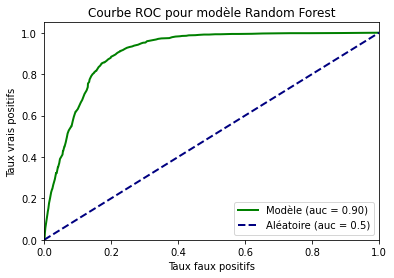

In [251]:
probs_rfc = rfc.predict_proba(X_test)
fpr, tpr, seuils = roc_curve(y_test, probs_rfc[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Modèle (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC pour modèle Random Forest')
plt.legend(loc="lower right")
plt.show();

In [252]:
# Sauvegarde des résultats
models.append("Random Forest")
scores.append(rfc.score(X_test, y_test))
precision.append(precision_score(y_test, rfc.predict(X_test)))
rappel.append(recall_score(y_test, rfc.predict(X_test)))
roc.append(roc_auc_score(y_test, rfc.predict(X_test)))

No handles with labels found to put in legend.


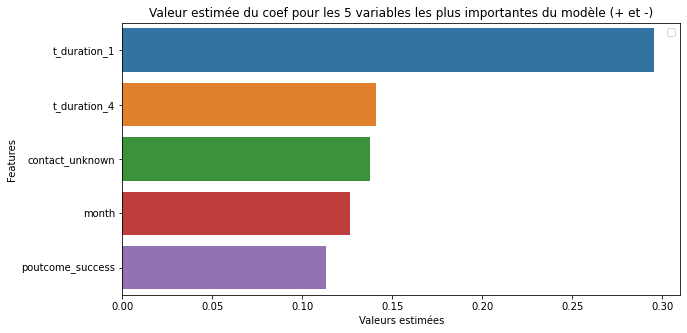

In [253]:
# Interpretabilité du modèle
coeffs_rfc=pd.DataFrame({'feature': feats.columns,'coef_rfc': dtc.feature_importances_})
coeffs_rfc["coef_rfc"]=np.abs(coeffs_rfc["coef_rfc"]) # valeur absolue
coeffs_rfc["rank_rfc"]=coeffs_rfc["coef_rfc"].rank(ascending=0) #ranking

plt.figure(figsize=(10,5))
sns.barplot(data=coeffs_rfc.sort_values("coef_rfc",ascending=False, key=abs).head(5),x="coef_rfc", y="feature")
plt.xlabel('Valeurs estimées')
plt.ylabel('Features')
plt.title('Valeur estimée du coef pour les 5 variables les plus importantes du modèle (+ et -)')
plt.legend();

# Comparaison des scores de chacun des modèles

In [254]:
# Recap des scores
compare = pd.DataFrame (models)
compare.columns = ['model']
compare["accuracy"]=scores
compare["precision"]=precision
compare["rappel"]=rappel
compare["roc"]=roc

compare.head().transpose()

,0,1,2,3
model,Regression logistique,K plus proches voisins,Decision Tree,Random Forest
accuracy,0.812612,0.811179,0.826227,0.839484
precision,0.805041,0.784969,0.824906,0.822557
rappel,0.806835,0.838039,0.812036,0.850669
roc,0.812414,0.812099,0.825741,0.839867


Text(0.5, 1.0, 'Compare Models')

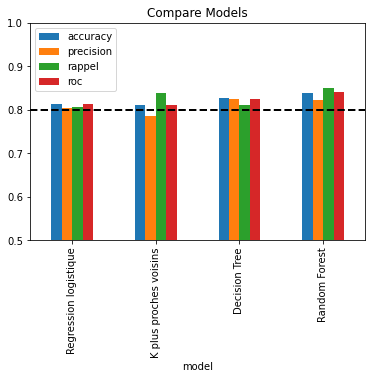

In [255]:
# Comparaison des scores
compare.plot.bar(x = 'model', y=['accuracy', 'precision', 'rappel','roc'],stacked=False, rot=90)
plt.ylim([0.5, 1])
plt.axhline(y=0.80, color='k', linewidth=2, linestyle='--')
plt.title("Compare Models")

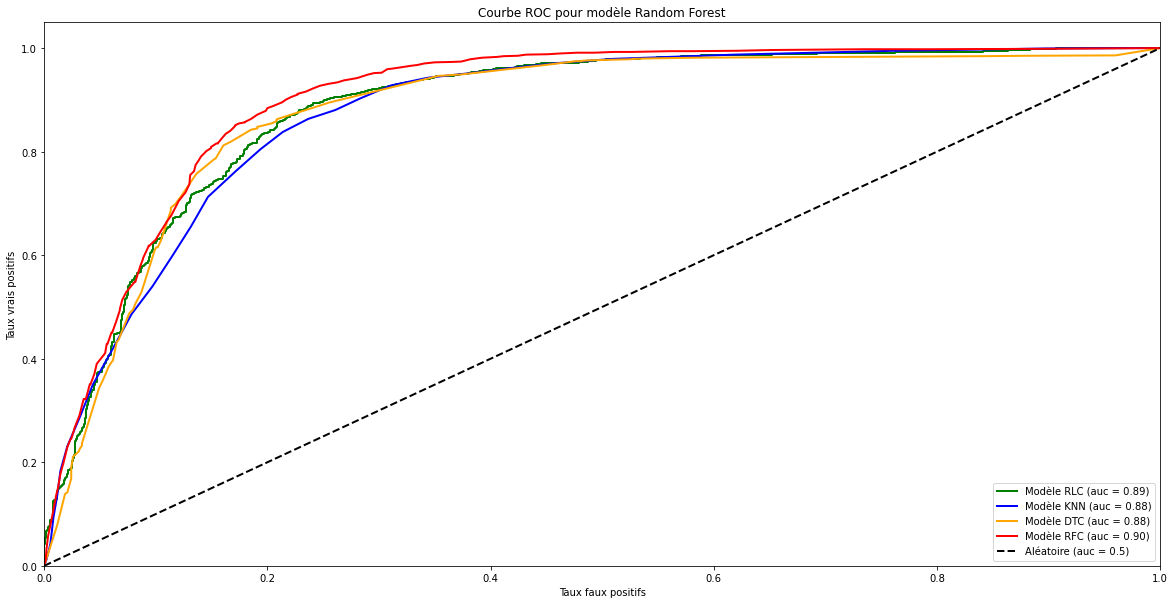

In [256]:
# Comparaison avec l'indice des ROC

plt.figure(figsize=(20, 10))

# Regression logistique
fpr, tpr, seuils = roc_curve(y_test, probs_rlc[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label='Modèle RLC (auc = %0.2f)' % roc_auc)

# K plus proches voisins
fpr, tpr, seuils = roc_curve(y_test, probs_knn[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='Modèle KNN (auc = %0.2f)' % roc_auc)

# Decision Tree
fpr, tpr, seuils = roc_curve(y_test, probs_dtc[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle DTC (auc = %0.2f)' % roc_auc)

# Random Forest
fpr, tpr, seuils = roc_curve(y_test, probs_rfc[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=2, label='Modèle RFC (auc = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC pour modèle Random Forest')
plt.legend(loc="lower right")
plt.show();

# Observations :

Le modèle Random Forest semble le plus équilibré. Il permet de maximiser les positifs.

# Comparaison des features importance

In [257]:
# Les 10 features les plus importantes selon le Random Forest et comparaison avec les autre modèles

coeffs=coeffs_rlc.merge(coeffs_dtc, left_on='feature', right_on='feature')
coeffs=coeffs.merge(coeffs_rfc, left_on='feature', right_on='feature')

coeffs=coeffs.sort_values("rank_rfc",ascending=True)
coeffs.head(10)

,feature,coef_rlc,rank_rlc,coef_dtc,rank_dtc,coef_rfc,rank_rfc
30,t_duration_1,1.878106,2.0,0.295090,1.0,0.295090,1.0
33,t_duration_4,2.225575,1.0,0.140892,2.0,0.140892,2.0
20,contact_unknown,0.729015,9.0,0.137442,3.0,0.137442,3.0
5,month,0.370538,16.0,0.126573,4.0,0.126573,4.0
16,poutcome_success,1.261907,3.0,0.112982,5.0,0.112982,5.0
2,housing,0.817705,7.0,0.050157,6.0,0.050157,6.0
4,day,0.283774,23.0,0.045816,7.0,0.045816,7.0
6,contact_last_campaign,0.825308,6.0,0.021868,8.0,0.021868,8.0
32,t_duration_3,0.236902,25.0,0.008524,9.0,0.008524,9.0
0,job,0.015908,38.0,0.007850,10.0,0.007850,10.0


# Zoom sur les features connues à posteriori

In [258]:
df4=df.copy()

In [259]:
probas=rfc.predict_proba(feats)
probas=pd.DataFrame(probas, columns=['NO','proba_rfc'], index=feats.index)
probas = probas.drop(['NO'], axis=1)
probas.head()

,proba_rfc
10447,0.19
6158,0.31
55,0.73
1127,0.54
4140,0.78


In [260]:
df4=df4.merge(probas,left_index=True, right_index=True)
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,proba_rfc
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0.56
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0.48
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0.71
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0.67
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0.70


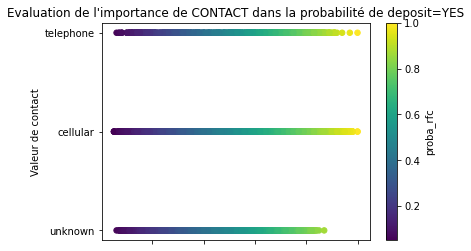

In [261]:
# Importance de CONTACT
df4.plot.scatter(x='proba_rfc', y='contact', c = 'proba_rfc', s=30, cmap = 'viridis');
plt.xlabel('Probabilités modèle Random Forest')
plt.ylabel('Valeur de contact')
plt.title("Evaluation de l'importance de CONTACT dans la probabilité de deposit=YES")
plt.show();

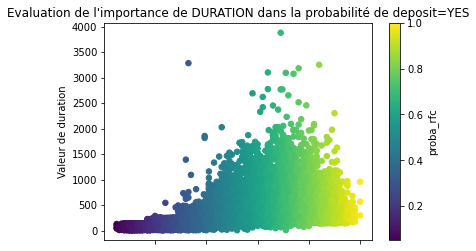

In [262]:
# Importance de DURATION
df4.plot.scatter(x='proba_rfc', y='duration', c = 'proba_rfc', s=30, cmap = 'viridis');
plt.xlabel('Probabilités modèle Random Forest')
plt.ylabel('Valeur de duration')
plt.title("Evaluation de l'importance de DURATION dans la probabilité de deposit=YES")
plt.show();

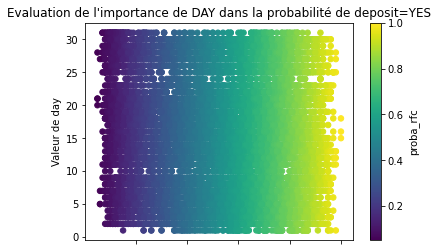

In [263]:
# Importance de DAY
df4.plot.scatter(x='proba_rfc', y='day', c = 'proba_rfc', s=30, cmap = 'viridis');
plt.xlabel('Probabilités modèle Random Forest')
plt.ylabel('Valeur de day')
plt.title("Evaluation de l'importance de DAY dans la probabilité de deposit=YES")
plt.show();

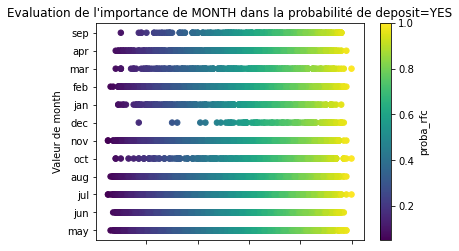

In [264]:
# Importance de MONTH
df4.plot.scatter(x='proba_rfc', y='month', c = 'proba_rfc', s=30, cmap = 'viridis');
plt.xlabel('Probabilités modèle Random Forest')
plt.ylabel('Valeur de month')
plt.title("Evaluation de l'importance de MONTH dans la probabilité de deposit=YES")
plt.show();

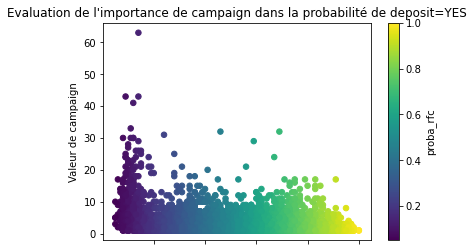

In [265]:
# Importance de CAMPAIGN
df4.plot.scatter(x='proba_rfc', y='campaign', c = 'proba_rfc', s=30, cmap = 'viridis');
plt.xlabel('Probabilités modèle Random Forest')
plt.ylabel('Valeur de campaign')
plt.title("Evaluation de l'importance de campaign dans la probabilité de deposit=YES")
plt.show();

# Observations

On remarque que la variable DURATION a un très fort impact sur la probabilité de répondre positivement à la campagne.
C'est également le cas pour la variable CAMPAIGN => Plus le nombre de contacts augmente, plus la probabilité de positivité diminue.
Month également semble modifier la tendance à la positivité.

A l'inverse, les variables day et contact semblent avoir peu d'impact.

=> On peut tenter le faire varier DURATION, CAMPAIGN et MONTH pour mesurer leur impact sur la campagne.

# Entrainement sur un jeu de données modifié

In [270]:
# boucle de calcul avec variation des features connues à posteriori

combos=[]
nb_yes =[]

for duration in ["t_duration_1", "t_duration_2", "t_duration_3", "t_duration_4"]:
    feats_modif=feats.copy()
    feats_modif["t_duration_1"]=0
    feats_modif["t_duration_2"]=0
    feats_modif["t_duration_3"]=0
    feats_modif["t_duration_4"]=0
    feats_modif[duration]=1
    # Stoke les résultats
    probs= rfc.predict(feats_modif)
    combos.append(str({duration}))
    nb_yes.append(sum(probs))

for campaign in ["t_campaign_1", "t_campaign_2", "t_campaign_3", "t_campaign_4"]:
    feats_modif=feats.copy()
    feats_modif["t_campaign_1"]=0
    feats_modif["t_campaign_2"]=0
    feats_modif["t_campaign_3"]=0
    feats_modif["t_campaign_4"]=0   
    feats_modif[campaign]=1       
    # Stoke les résultats
    probs= rfc.predict(feats_modif)
    combos.append(str({campaign}))
    nb_yes.append(sum(probs))

for month in list(range(1, 13)):
    feats_modif=feats.copy()
    feats_modif["month"]=month 
    # Stoke les résultats
    probs= rfc.predict(feats_modif)
    combos.append(str({month}))
    nb_yes.append(sum(probs))

In [271]:
compare_combos = pd.DataFrame(combos)
compare_combos.columns = ['combos']
compare_combos["nb_yes"]=nb_yes
compare_combos.head(20)

,combos,nb_yes
0,{'t_duration_1'},963
1,{'t_duration_2'},4519
2,{'t_duration_3'},7399
3,{'t_duration_4'},10475
4,{'t_campaign_1'},6653
5,{'t_campaign_2'},5623
6,{'t_campaign_3'},5659
7,{'t_campaign_4'},5271
8,{1},5954
9,{2},5954


Text(0.5, 1.0, 'Compare Combos')

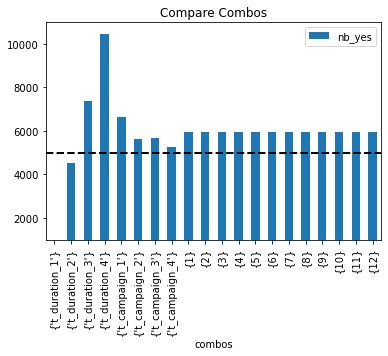

In [272]:
compare_combos.plot.bar(x = 'combos', y=['nb_yes'],stacked=False, rot=90)
plt.ylim([1000, 11000])
plt.axhline(y=5000, color='k', linewidth=2, linestyle='--')
plt.title("Compare Combos")

# Observations

On remarque que l'on maximise les chances de concrétiser la campagne lorque le contact dure plus longtemps (duration).
On voit également qu'il est préférable de limiter le nombre de contacts. (campaign)

A l'inverse, la feature month ne semble pas influer.

On va tenter d'entraîner notre modèle sur un jeu "forcé" à duration_4 et campaign_1.

In [273]:
feats_modif=feats.copy()
feats_modif["t_duration_1"]=0
feats_modif["t_duration_2"]=0
feats_modif["t_duration_3"]=0
feats_modif["t_duration_4"]=1
feats_modif["t_campaign_1"]=1
feats_modif["t_campaign_2"]=0
feats_modif["t_campaign_3"]=0
feats_modif["t_campaign_4"]=0 
    
# Stoke les résultats
probs= rfc.predict(feats_modif)
print("Nb_yes = ", sum(probs))
print("%_yes = ", sum(probs)/11162)


Nb_yes =  10612
%_yes =  0.9507256764020785


# Conclusion

Une durée de contact élevée et la limitation du nombre de contacts semble être la formule gagnante pour maximiser la performance de la future campagne.